# Data Cleaning
###### First the given data is imported then the columns with more than 50% null values are dropped.

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loan_data = pd.read_csv('loan.csv')
half = len(loan_data) / 2
loan_data = loan_data.dropna(thresh=half, axis=1)
loan_data.shape

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 54)

###### There are 54 columns now. We have to drop the columns which are not useful for analysis.
###### First we'll start with the columns which have a single value. They are of no use in analysis. Hence we drop them too.

In [2]:
orig_columns = loan_data.columns
drop_columns = []
for col in orig_columns:
    col_series = loan_data[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan_data = loan_data.drop(drop_columns, axis = 1)
loan_data.shape

(39717, 45)

### __Removal of Columns:__

###### __1)__ __id__, __member_id__, __url__:  They are unique. Hence they are dropped.
###### __2)__ __desc__: Description provided by the borrower cannot be used for the analysis.
###### __3)__ __title__, __emp_title__: They are not useful for our analysis.
###### __4)__ __grade__, __sub_grade__: These columns are dropped because grades are decided by the interest rate. As we are including the interest rates, we are intentionally dropping the grades columns.
###### __5)__ __funded_amnt__, __funded_amnt_inv__, __last_pymnt_amnt__, __revol_util__, __total_rec_prncp__, __total_pymnt__, __total_pymnt_inv__, __total_rec_late_fee__, __total_rec_int__, __revol_bal__, __collection_recovery_fee__, __out_prncp__, __out_prncp_inv__: These columns are dropped because they are decided only after the approval of loan by the bank. But our analysis is to predict the charge-off loans before approval.
###### __6)__ __issue_d__, __last_credit_pull_d__, __last_pymnt_d__, __zip_code__: These columns are excluded because they are hard to evaluate.

In [3]:
loan_data=loan_data.drop(['id','member_id','url','desc','zip_code','title','emp_title','grade','sub_grade','funded_amnt','funded_amnt_inv','issue_d','addr_state','earliest_cr_line','last_credit_pull_d','last_pymnt_d','last_pymnt_amnt','revol_util','total_rec_prncp','total_pymnt','collection_recovery_fee','out_prncp','out_prncp_inv','total_pymnt_inv','total_rec_int','total_rec_late_fee','revol_bal'],axis=1)

###### __pub_rec_bankruptcies__ column is removed because most of the values are 0.

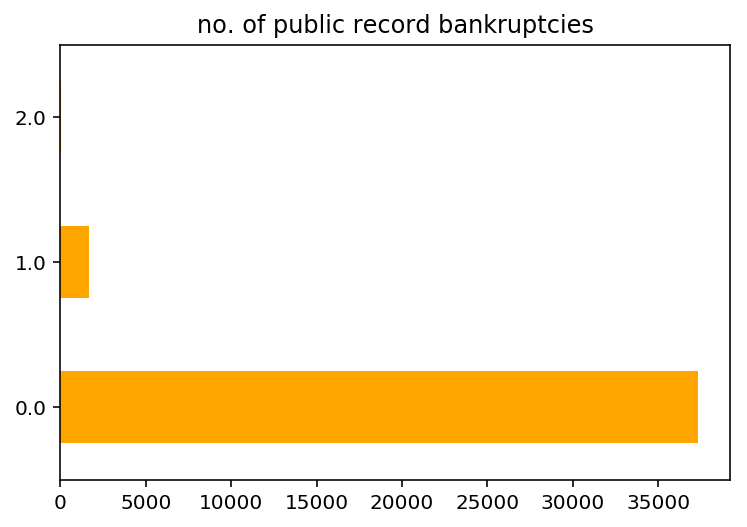

In [4]:
loan_data['pub_rec_bankruptcies'].value_counts().plot(kind='barh',color='orange',title='no. of public record bankruptcies')
plt.show()
loan_data=loan_data.drop('pub_rec_bankruptcies',axis=1)

In [5]:
print(loan_data.isnull().sum())
loan_data.dropna(axis=0)   #rows containing null values are removed

loan_amnt                 0
term                      0
int_rate                  0
installment               0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
delinq_2yrs               0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
total_acc                 0
recoveries                0
dtype: int64


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,recoveries
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,0,1,3,0,9,0.00
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,1.00,0,5,3,0,4,117.08
2,2400,36 months,15.96%,84.33,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,10,0.00
3,10000,36 months,13.49%,339.31,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,20.00,0,1,10,0,37,0.00
4,3000,60 months,12.69%,67.79,1 year,RENT,80000.00,Source Verified,Current,other,17.94,0,0,15,0,38,0.00
5,5000,36 months,7.90%,156.46,3 years,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20,0,3,9,0,12,0.00
6,7000,60 months,15.96%,170.08,8 years,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,23.51,0,1,7,0,11,0.00
7,3000,36 months,18.64%,109.43,9 years,RENT,48000.00,Source Verified,Fully Paid,car,5.35,0,2,4,0,4,0.00
8,5600,60 months,21.28%,152.39,4 years,OWN,40000.00,Source Verified,Charged Off,small_business,5.55,0,2,11,0,13,189.06
9,5375,60 months,12.69%,121.45,< 1 year,RENT,15000.00,Verified,Charged Off,other,18.08,0,0,2,0,3,269.29


###### Given below are the columns remaining for our analysis. Total there are 17 columns. We'll analyse the columns one by one. 

In [6]:
loan_data.iloc[25]

loan_amnt                    15000
term                     36 months
int_rate                     9.91%
installment                 483.38
emp_length                 2 years
home_ownership            MORTGAGE
annual_inc                   92000
verification_status       Verified
loan_status             Fully Paid
purpose                credit_card
dti                          29.44
delinq_2yrs                      0
inq_last_6mths                   0
open_acc                         8
pub_rec                          0
total_acc                       31
recoveries                       0
Name: 25, dtype: object

##### __Loan status:__
###### First a bar plot is plotted for the __loan_status__ column. We can observe that rows with __current__ are very less. Hence these rows are dropped for more accuracy.

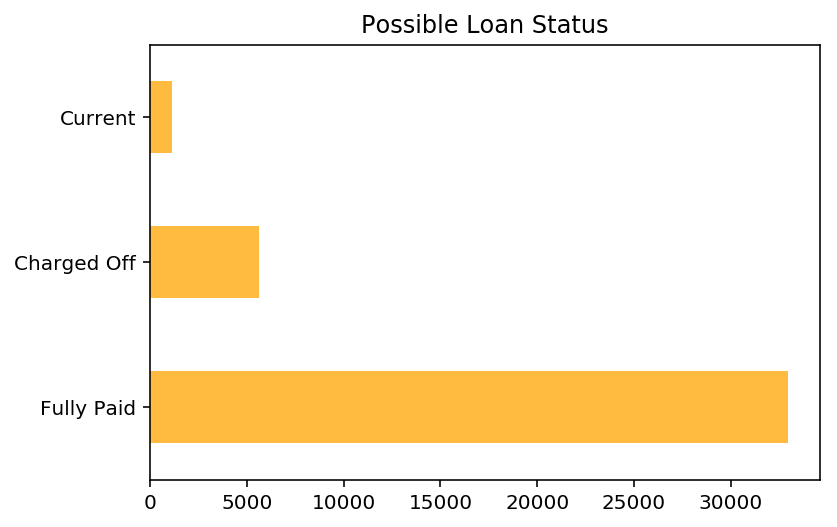

In [7]:
loan_data['loan_status'].value_counts()
loan_data['loan_status'].value_counts().plot(kind='barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)
plt.show()
loan_data=loan_data[loan_data.loan_status != 'Current']

##### __home_ownership:__
###### From the countplot we can observe that the charge-off is less for own house borrowers. Also the __OTHER__, __NONE__ have very less values, hence are droppped 

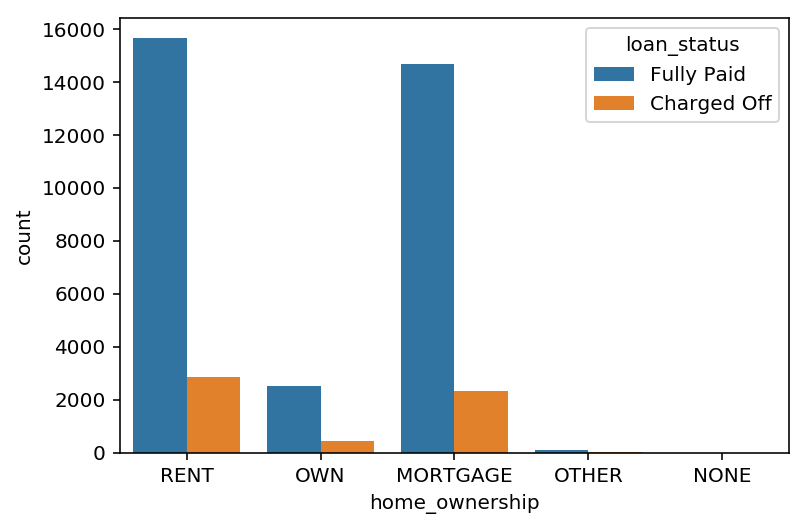

In [8]:
sns.countplot(x='home_ownership',hue='loan_status',data=loan_data)
loan_data=loan_data[loan_data.home_ownership != 'NONE']
loan_data=loan_data[loan_data.home_ownership != 'OTHER']

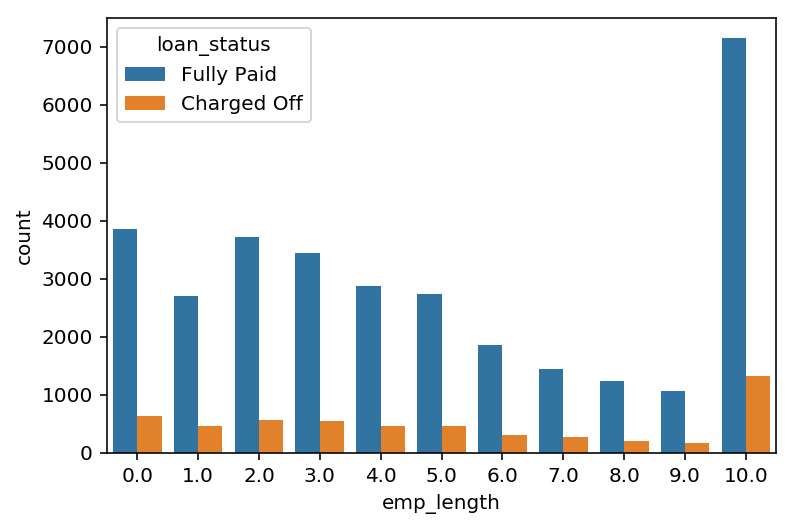

In [9]:
loan_data['emp_length']=loan_data['emp_length'].map({'10+ years': 10,'9 years': 9,'8 years': 8,'7 years': 7,'6 years': 6,'5 years': 5,'4 years': 4,'3 years': 3,'2 years': 2,'1 year': 1,'< 1 year': 0})

sns.countplot(x='emp_length',hue='loan_status',data=loan_data)


In [10]:
loan_data["int_rate"] = loan_data["int_rate"].str.rstrip("%").astype("float")
loan_data['loan_status']=loan_data['loan_status'].map({'Fully Paid':1,'Charged Off':0})

##### __Univariate Analysis__
###### The loan amount mostly lies in the range of 5000-15000.

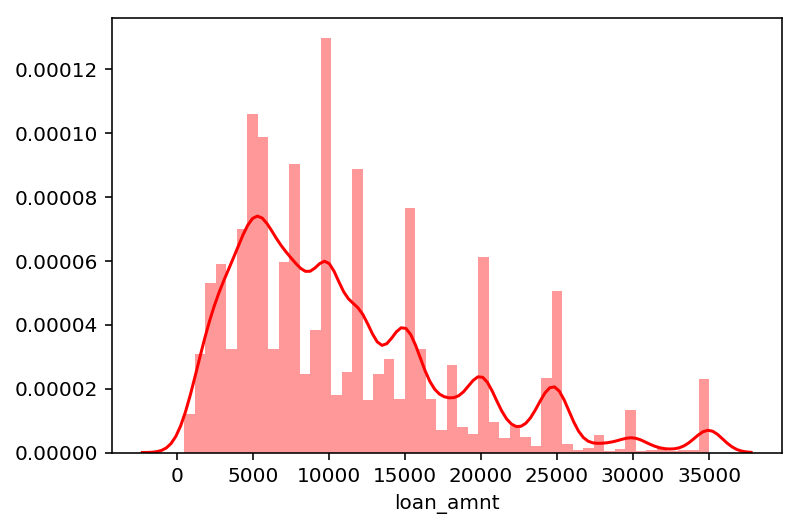

In [11]:
sns.distplot(loan_data['loan_amnt'],hist=True,color='red')

###### Majority of the annual income lies below 200000

(0, 1000000)

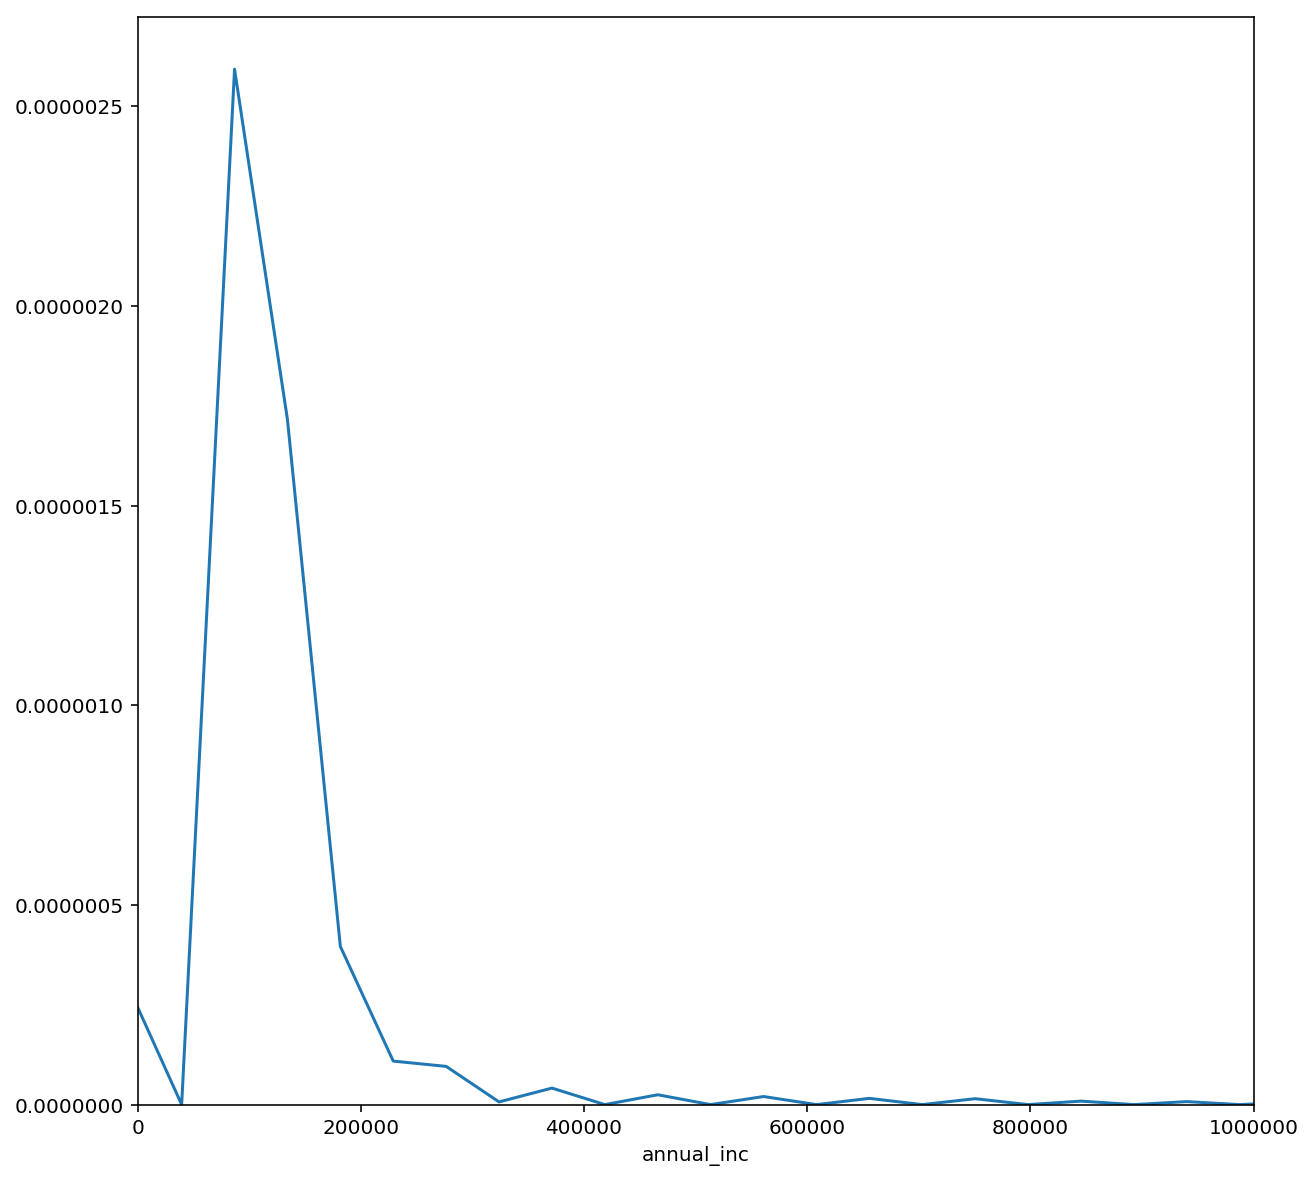

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(loan_data['annual_inc'],hist=False)
plt.xlim(0,1000000)

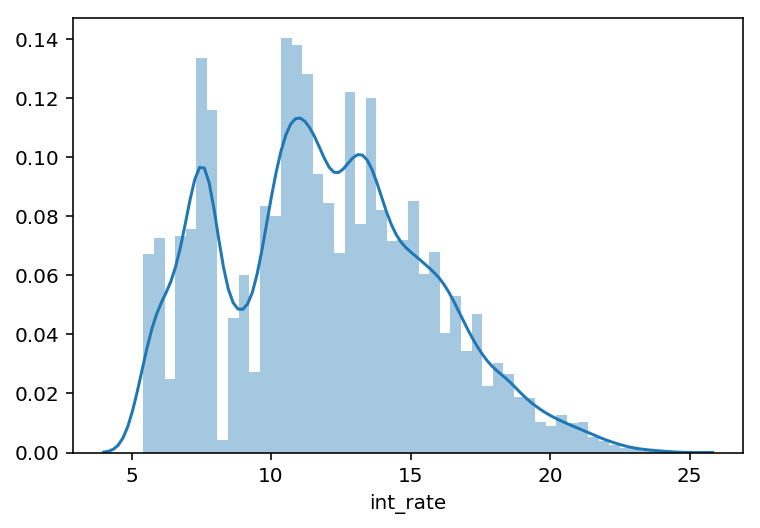

In [13]:
sns.distplot(loan_data['int_rate'])

##### __Bivariate Analysis:__

###### Majority of the borrowers are opting for 2 years loan over 5 years.

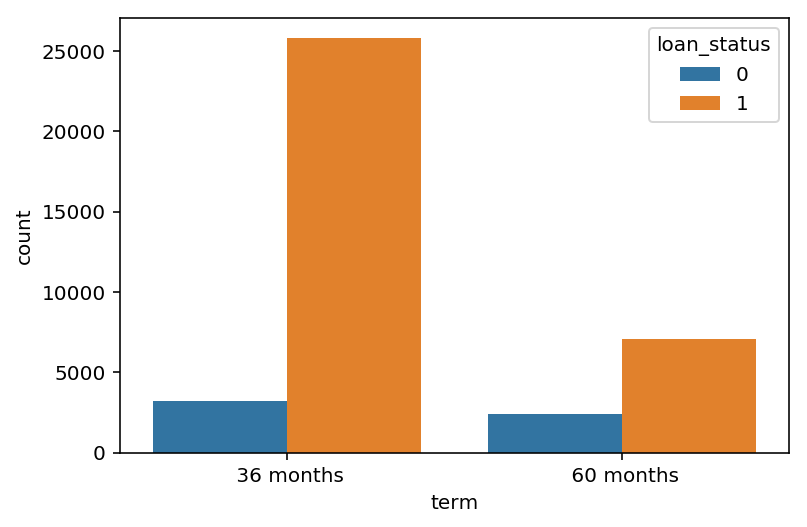

In [14]:
sns.countplot(x='term',hue='loan_status',data=loan_data)

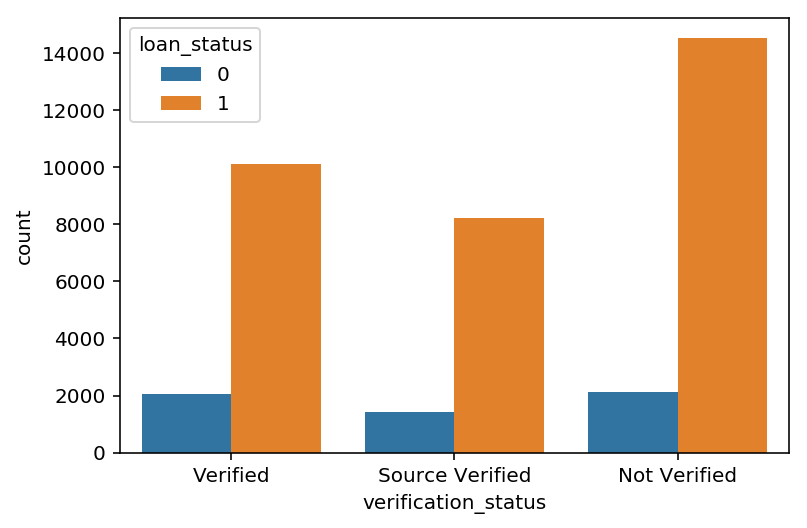

In [15]:
sns.countplot(x='verification_status',hue='loan_status',data=loan_data)

###### The median annual income is greater for the ones who paid off their loans

(0, 200000)

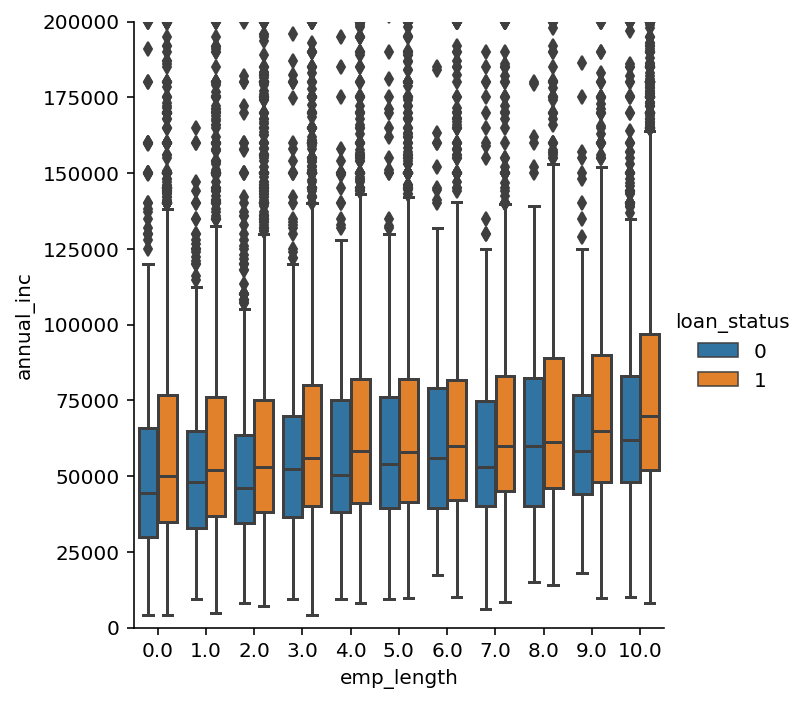

In [16]:
plt.figure(figsize=(80,20))
sns.catplot(kind='box', x='emp_length',y='annual_inc',hue='loan_status',data=loan_data)
plt.ylim(0,200000)

###### median loan_amnt is greater for 

(0, 40000)

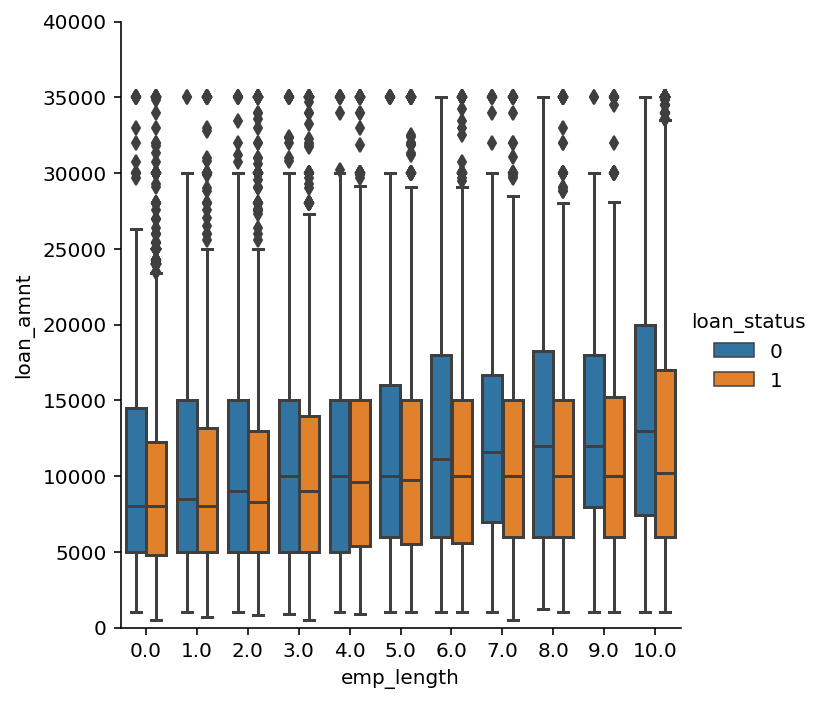

In [17]:
plt.figure(figsize=(80,20))
sns.catplot(kind='box', x='emp_length',y='loan_amnt',hue='loan_status',data=loan_data)
plt.ylim(0,40000)

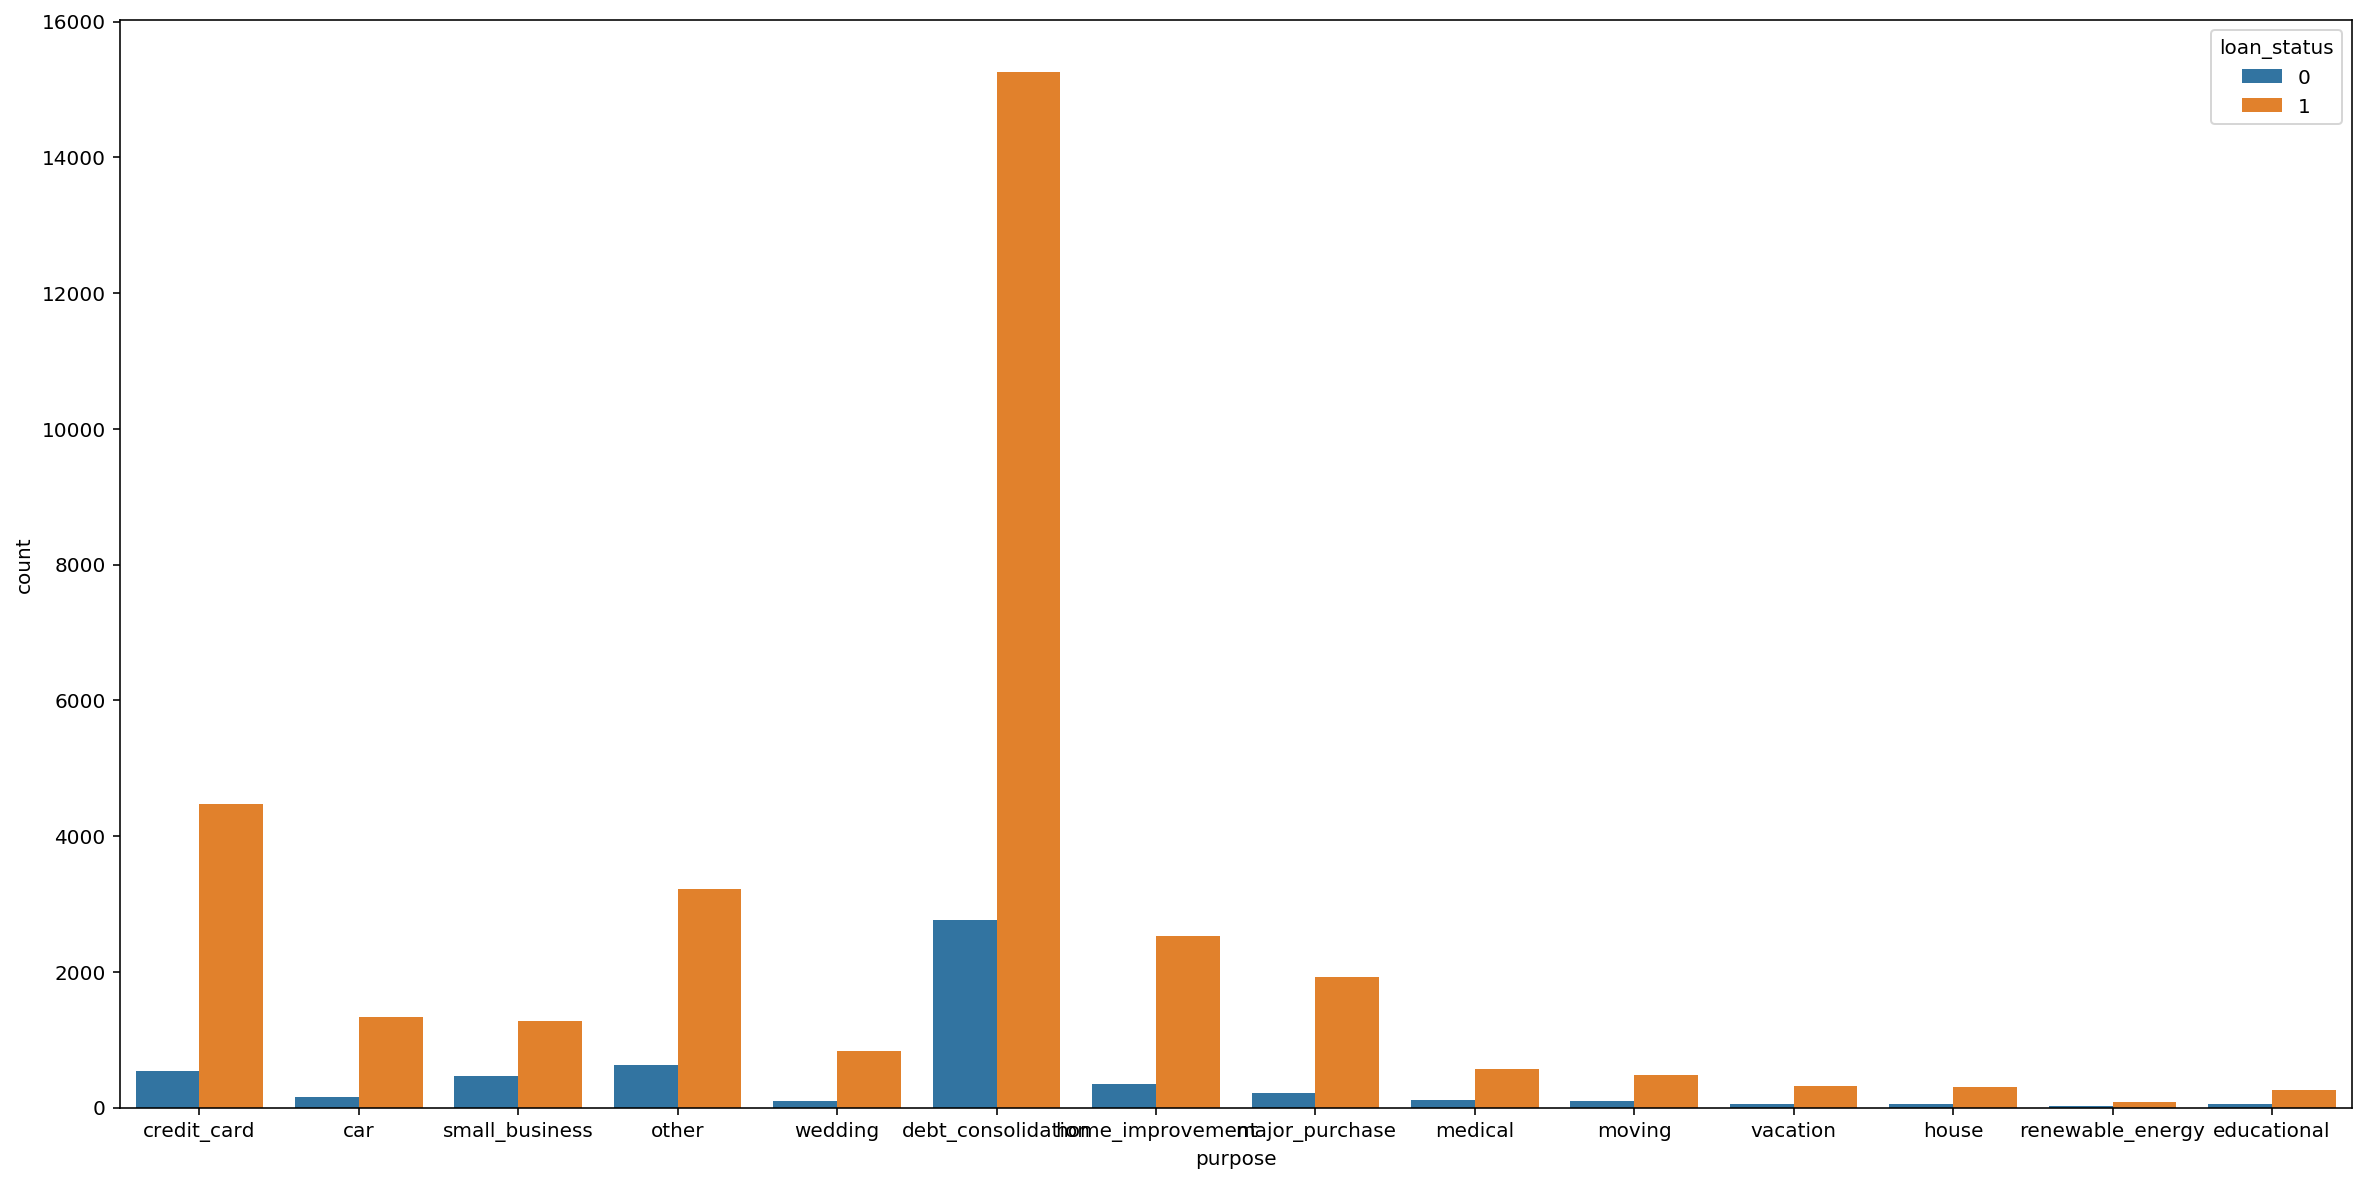

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='purpose',hue='loan_status',data=loan_data)

##### __Dummy Columns__

In [19]:
dummy_columns= ["home_ownership", "verification_status", "emp_length", "purpose", "term"]
dummy_df = pd.get_dummies(loan_data[dummy_columns])
loan_data = pd.concat([loan_data, dummy_df], axis=1)
loan_data = loan_data.drop(dummy_columns, axis=1)

In [20]:
loan_data.iloc[0]

loan_amnt                               5000.00
int_rate                                  10.65
installment                              162.87
annual_inc                             24000.00
loan_status                                1.00
dti                                       27.65
delinq_2yrs                                0.00
inq_last_6mths                             1.00
open_acc                                   3.00
pub_rec                                    0.00
total_acc                                  9.00
recoveries                                 0.00
home_ownership_MORTGAGE                    0.00
home_ownership_OWN                         0.00
home_ownership_RENT                        1.00
verification_status_Not Verified           0.00
verification_status_Source Verified        0.00
verification_status_Verified               1.00
purpose_car                                0.00
purpose_credit_card                        1.00
purpose_debt_consolidation              

#### __Feature importance__
###### __1)__ Univariate Selection
###### __2)__ Feature Importance
###### __3)__ Correlation Matrix with Heatmap

###### Here chi-squared statistical analysis is used to know the important features in the data.
###### From the below code we can find that __recoveries__, __annual_inc__, __loan_amount__, __installment__ are the most important features

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = loan_data.drop('loan_status',axis=1)
y = loan_data['loan_status']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                     Specs         Score
10              recoveries  2.209285e+07
3               annual_inc  3.845778e+06
0                loan_amnt  6.560844e+05
2              installment  3.652135e+03
1                 int_rate  1.966279e+03
32         term_ 60 months  8.761516e+02
31         term_ 36 months  2.864504e+02
6           inq_last_6mths  2.612749e+02
4                      dti  2.602386e+02
28  purpose_small_business  2.163468e+02


###### From this analysis(ExtraTreesClassifier) we can find out that __recoveries__, __int_rate__, __annual_inc__, __installment__ are the top features

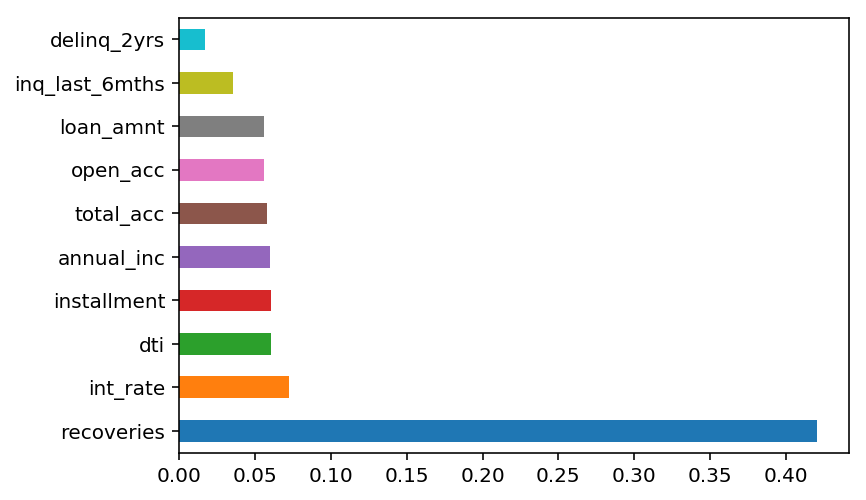

In [22]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


###### From the heat map we can observe that __loan_status__ is more dependent on __recoveries__, __int_rate__ 

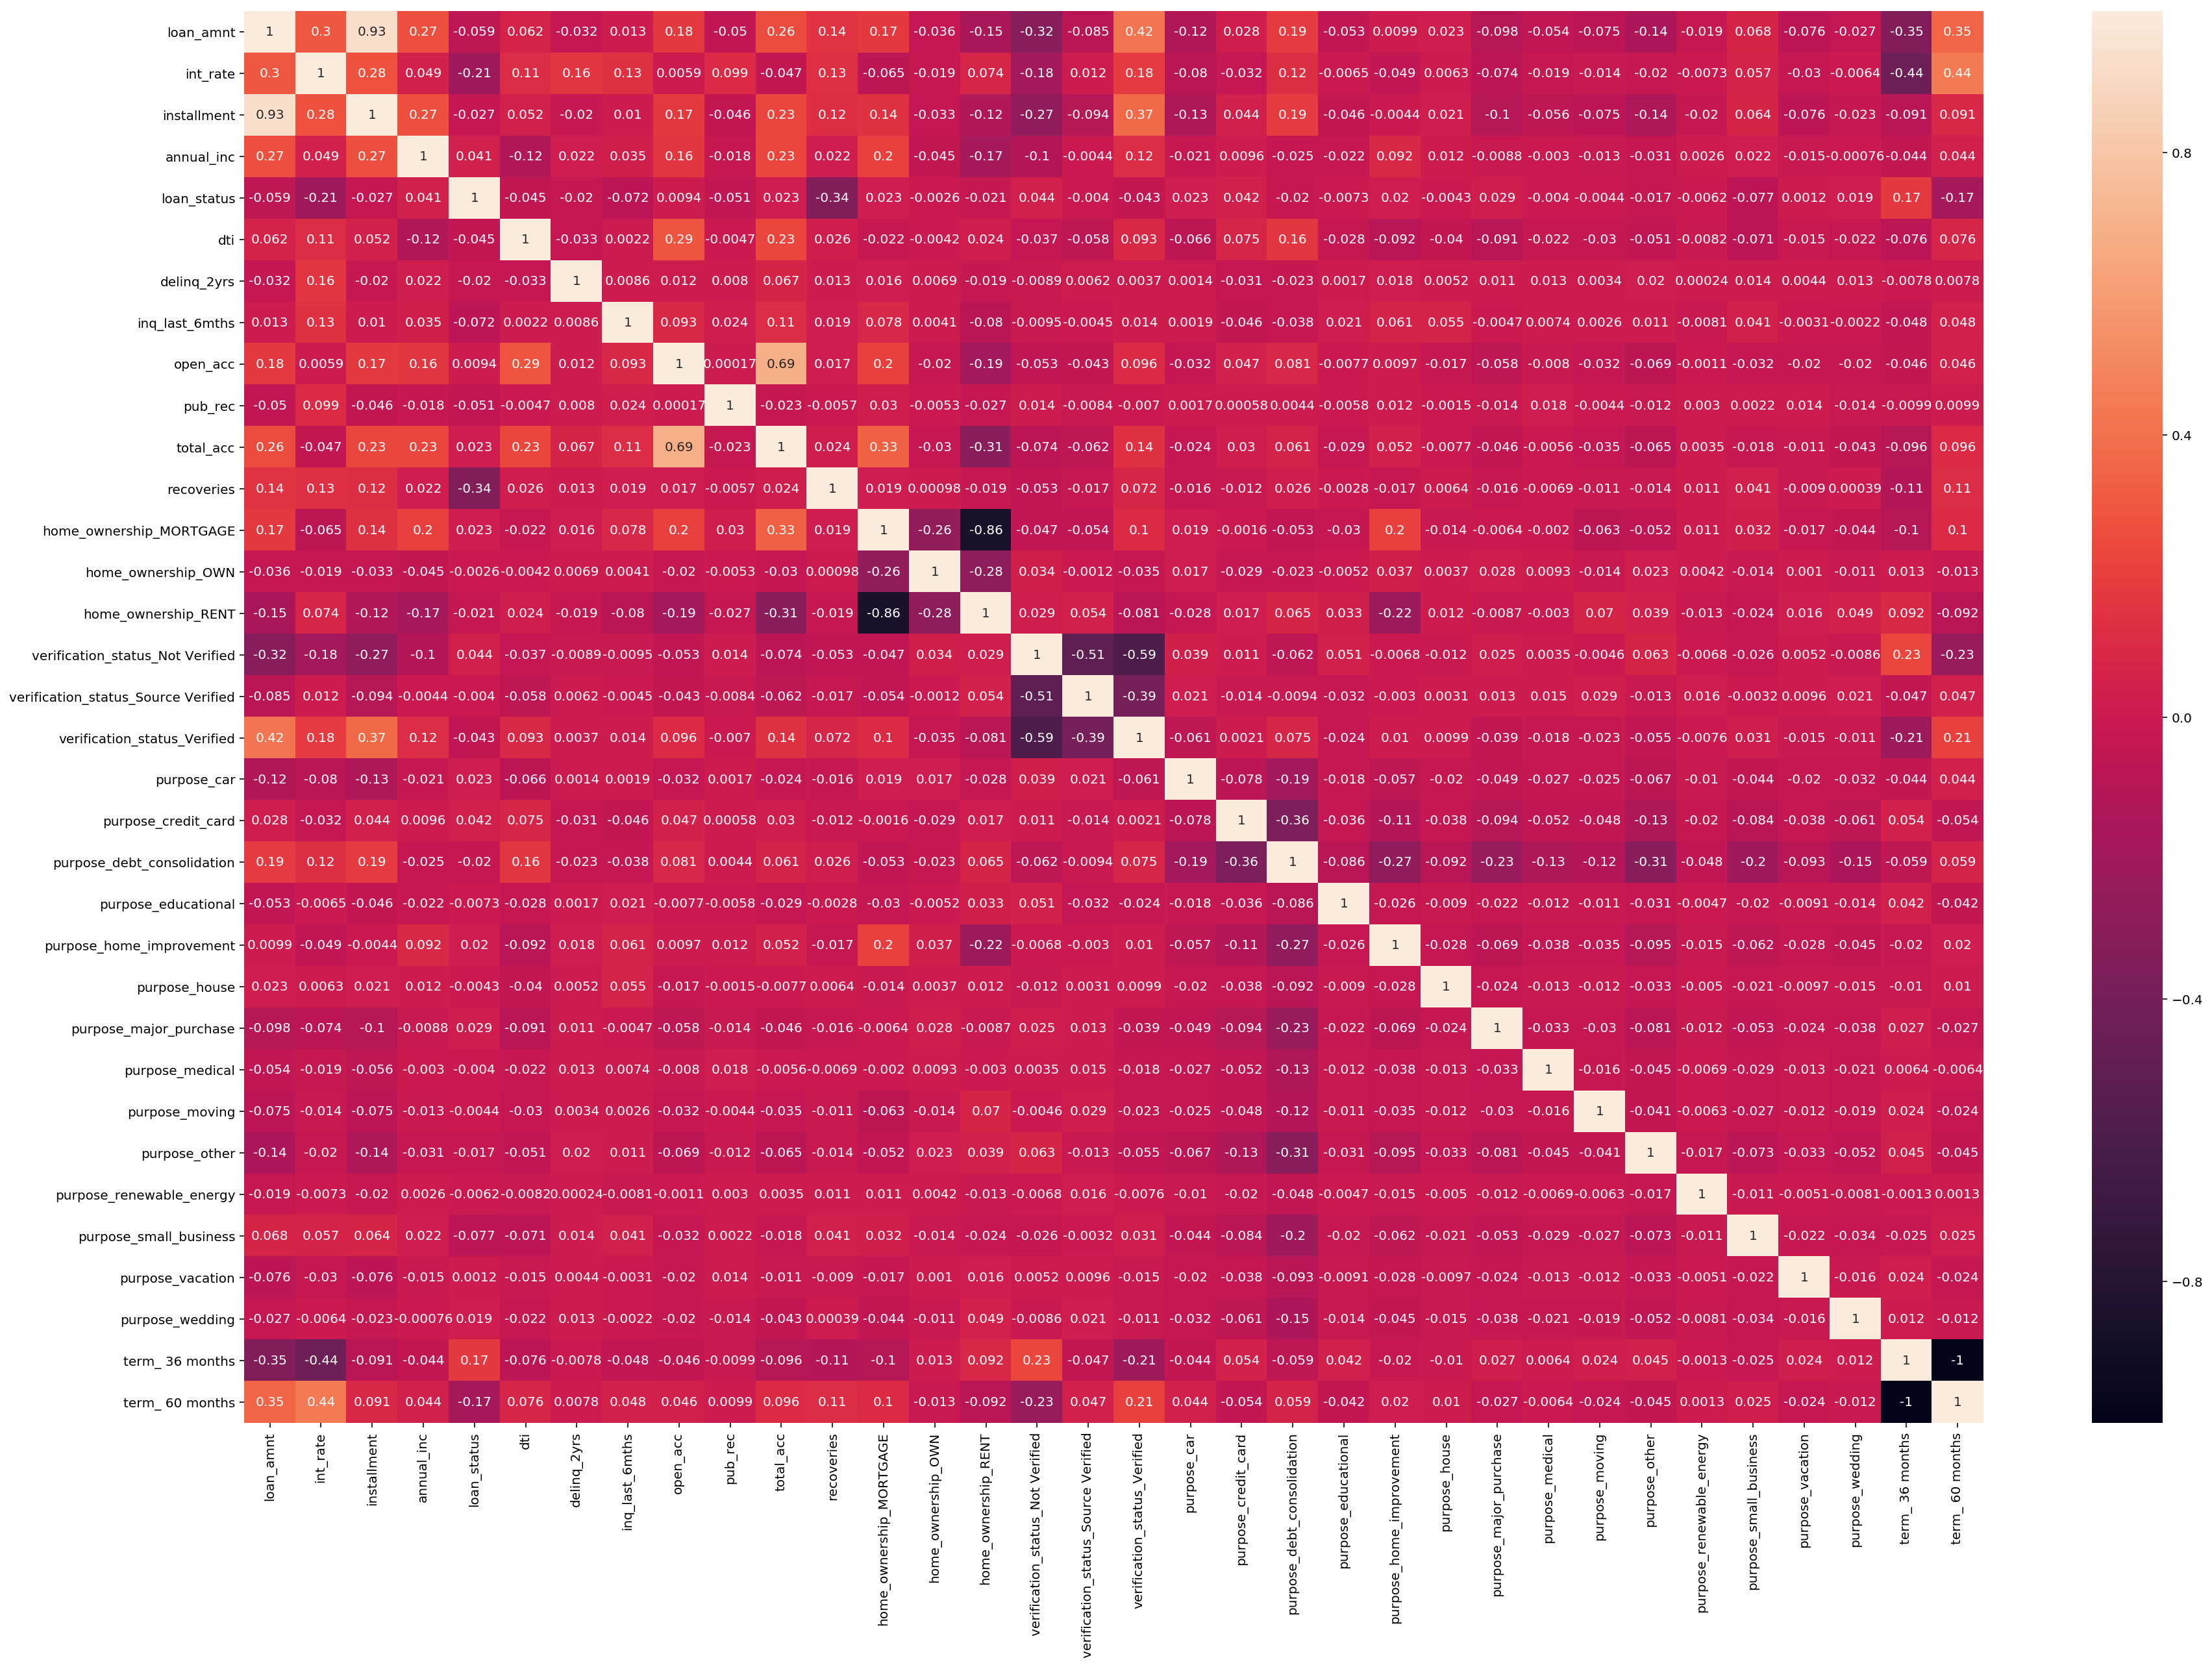

In [23]:
corrmat = loan_data.corr()
plt.figure(figsize=(30,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

## Algorithm

##### __1) Logistic Regression__

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import operator
lr=LogisticRegression()
y=loan_data['loan_status']
X=loan_data.drop('loan_status',axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y)
lr.fit(X_train,y_train)

y_pred_lr=lr.predict(X_test)
ans=accuracy_score(y_test,y_pred_lr)
print(ans)

/usr/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.9542571992930658


##### __2) Random Forest__

In [25]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_rfc=rfc.predict(X_test)
ans=accuracy_score(y_test,y_pred_rfc)
print(ans)

0.9635097203451503


##### __3) Decision Tree__

In [26]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
ans=accuracy_score(y_test,y_pred_dt)
print(ans)

0.9268115188689053
